<a href="https://colab.research.google.com/github/yanin254417/Data-Mining/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_2_MainExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

In this notebook we will study the famed Iris data set.  This data set has been studied for many years by people doing machine learning.  In fact the dataset was first treated by R.A. Fisher.  He is a rather handsome fellow, and we should be particularily impressed with his goatee!

<img src="http://www.42evolution.org/wp-content/uploads/2014/07/Ronald-Fisher-from-Royal-Society.jpg" style="width:300px">

We chose this dataset because it is well studied but also well known to be non-trivial to get good answers from it.

It is so well studied that there are even YouTube videos about it.  We can directly embed such a video in our notebook to liven up our presentation.

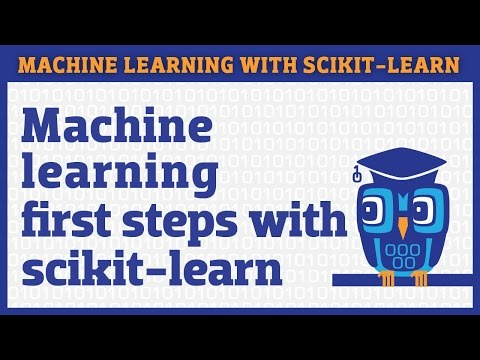

In [ ]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hd1W4CyPX58')

In fact all of the datasets that we have for this workshop come with their own descriptions.  Note this data set has been studied since 1936 (at least), and there are still open questions.  The data has many interesting features, such as 3 different classes, of varying difficulty and four dimensional features.

In [11]:
# we need to give Google Colab access to Google Drive
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [14]:
print(open('/content/drive/MyDrive/Colab Notebooks/iris.txt', 'r').read())

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/640px-Iris_versicolor_3.jpg" style="width:300px">

# Loading in the libraries.

In [15]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib.pylab as py
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib inline

# Introduction

The first thing when we work with data is to take a a look at this, so we thought that we would do the same thing.  So, we begin our analysis by reading in the data. This was not as trivial as we have originally thought since we kept running into errors.  The problem was that:

<b> we needed to make sure the data was in the correct directory</b>

The eaisiest thing to do is have the data in the same directory at the Jupyter notebook.

In [16]:
ls

drive/  sample_data/


In [18]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv')

In [ ]:
data

,sepal length,sepal width,petal length,petal width,flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


The Python index starts at 0.

The size of our data was

In [19]:
data.shape

(150, 5)

Which means we have 150 total measurements and each measurement has 5 values.  For examples our first measurement is

In [20]:
data.iloc[0,:]

sepal length    5.1
sepal width     3.5
petal length    1.4
petal width     0.2
flower type     0.0
Name: 0, dtype: float64

Observe that we want to predict the flower type from the predictors

1. sepal length
2. sepal width
3. petal length
4. petal width

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/640px-Iris_versicolor_3.jpg" style="width:300px">

# Looking at the data

In [21]:
X = np.array(data.iloc[:, :-1]) # index -1 means the last element in an array
y = np.array(data.iloc[:, -1])

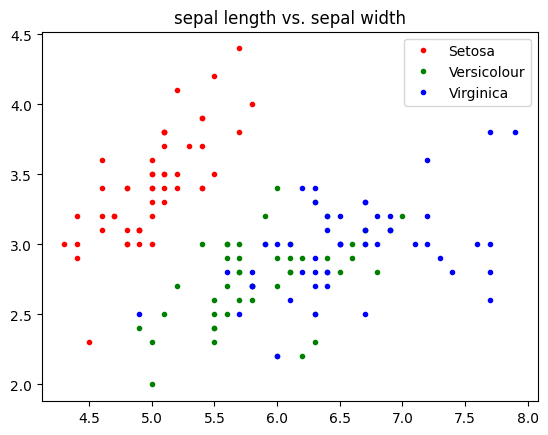

In [22]:
plt.figure()
plt.plot(X[y==0,0],X[y==0,1],'r.',label='Setosa')
plt.plot(X[y==1,0],X[y==1,1],'g.',label='Versicolour')
plt.plot(X[y==2,0],X[y==2,1],'b.',label='Virginica')
plt.title('sepal length vs. sepal width')
plt.legend()

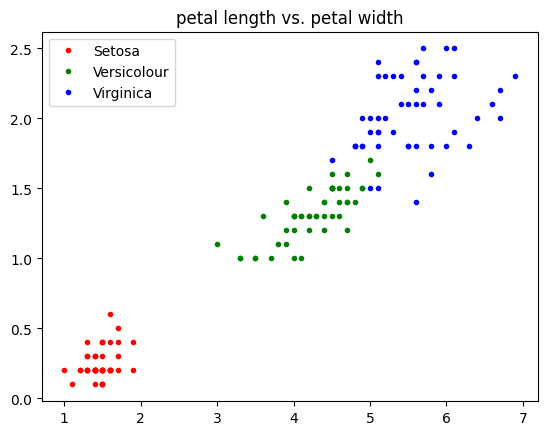

In [23]:
plt.figure()
plt.plot(X[y==0,2],X[y==0,3],'r.',label='Setosa')
plt.plot(X[y==1,2],X[y==1,3],'g.',label='Versicolour')
plt.plot(X[y==2,2],X[y==2,3],'b.',label='Virginica')
plt.title('petal length vs. petal width')
plt.legend()

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Create color lists according to the label

In [25]:
color_list = ['red','green','blue']
type_cols = [color_list[i] for i in y]

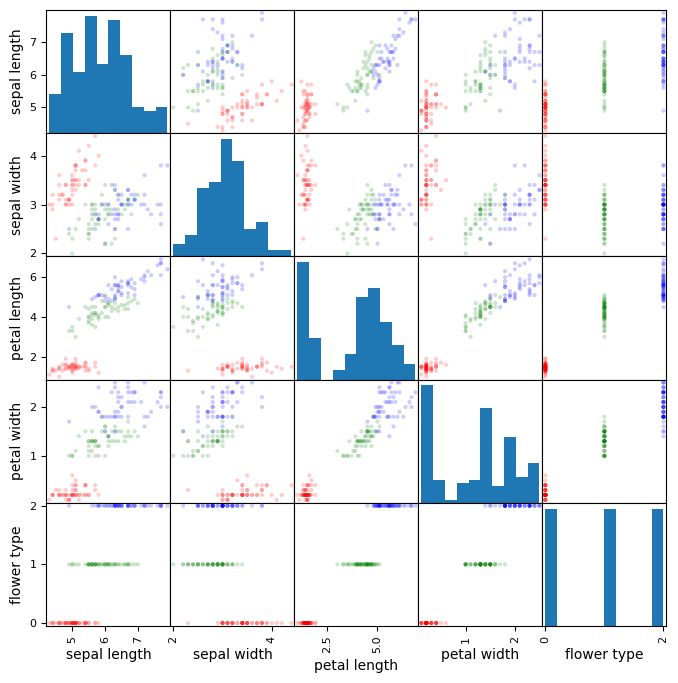

In [26]:
pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(8,8), c=type_cols);

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], c='r')
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='g')
ax.scatter(X[y==2, 0], X[y==2, 1], X[y==2, 2], c='b')

<Figure size 800x600 with 0 Axes>

# Data processing

## Asking the right question

One of the most important aspects of data analysis is to ask the right question. So, we thought that we would preprocess our data to ask two different questions, one we think is easy, and one we think is hard.  The easy question we propose is to
just distinguish class 0 from classes 1 and 2.  Based upon our visualizations, we assume that this problem willl be very easy to solve using the petal lengths and petal widths

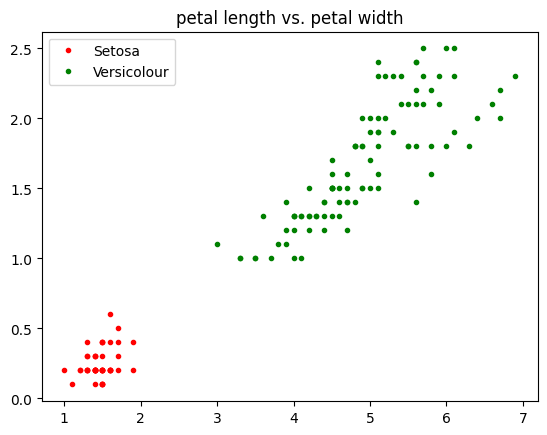

In [28]:
plt.figure()
plt.plot(X[y==0,2],X[y==0,3],'r.',label='Setosa')
plt.plot(X[y!=0,2],X[y!=0,3],'g.',label='Versicolour')
plt.title('petal length vs. petal width')
plt.legend()

We also plan to test the sepal widths and the sepal lengths, even though that problem will likely be harder.

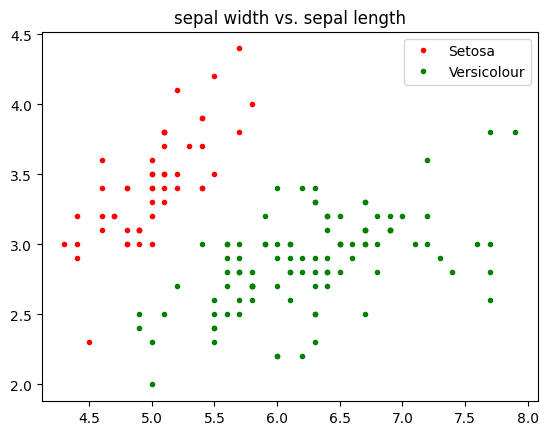

In [29]:
plt.figure()
plt.plot(X[y==0,0],X[y==0,1],'r.',label='Setosa')
plt.plot(X[y!=0,0],X[y!=0,1],'g.',label='Versicolour')
plt.title('sepal width vs. sepal length')
plt.legend()

Finally we will test the full data set (all four columns) against all three classes.  However, plotting this data is rather difficult, so we needed to try something more advanced.  